In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

100%|██████████| 22.0M/22.0M [00:01<00:00, 15.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1


In [ ]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("gokulrajkmv/unemployment-in-india")
print("Path to dataset directory:", path)

# List files in the downloaded dataset directory
files = os.listdir(path)
print("Files in the dataset directory:", files)

# Assuming there is a single CSV file in the directory
csv_file = [file for file in files if file.endswith('.csv')]

# Check if a CSV file was found and read it
if csv_file:
    df = pd.read_csv(os.path.join(path, csv_file[0]))
    print("Dataset loaded successfully.")
else:
    print("No CSV file found in the directory.")

100%|██████████| 16.0k/16.0k [00:00<00:00, 10.7MB/s]

Extracting files...
Path to dataset directory: /root/.cache/kagglehub/datasets/gokulrajkmv/unemployment-in-india/versions/5
Files in the dataset directory: ['Unemployment_Rate_upto_11_2020.csv', 'Unemployment in India.csv']
Dataset loaded successfully.


In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
longitude,0
latitude,0


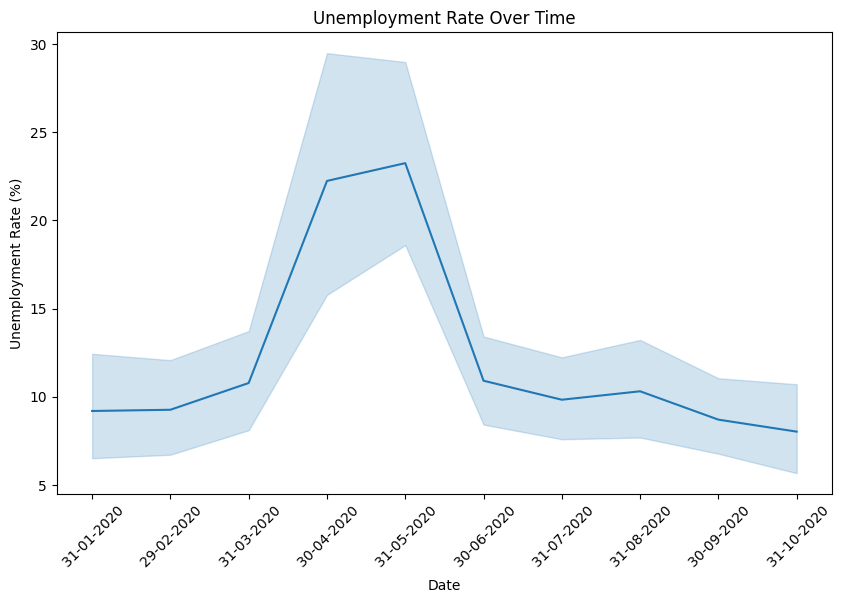

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df.columns = df.columns.str.strip()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df)
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

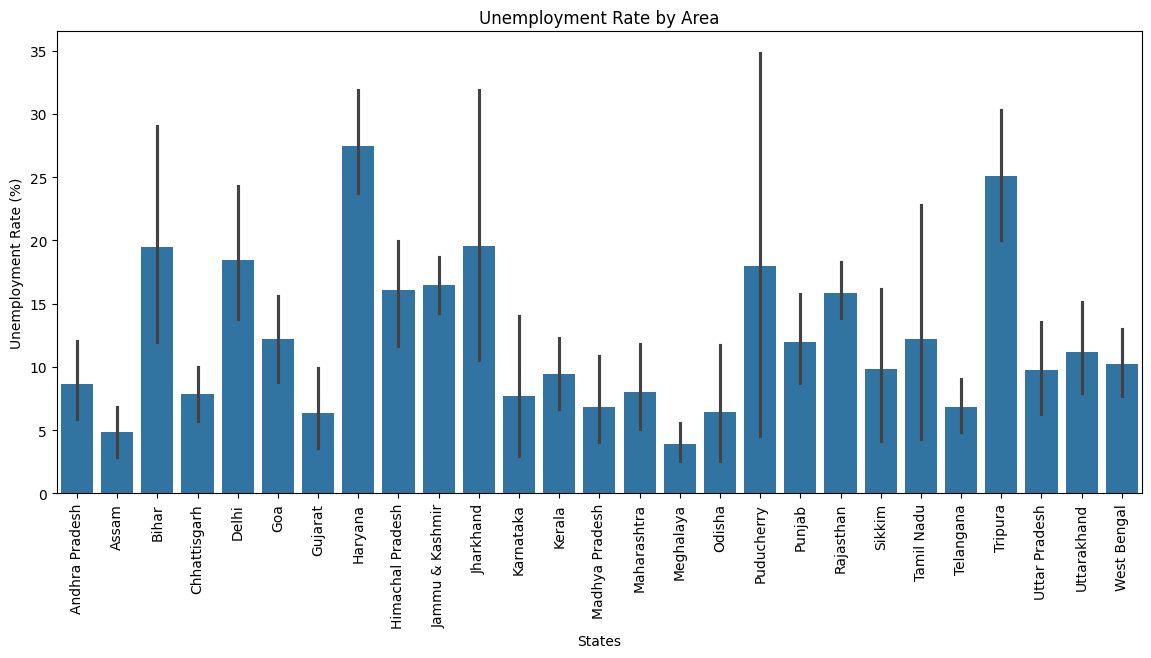

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=df)
plt.title('Unemployment Rate by Area')
plt.xlabel('States')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Unemployment Rate (%)')

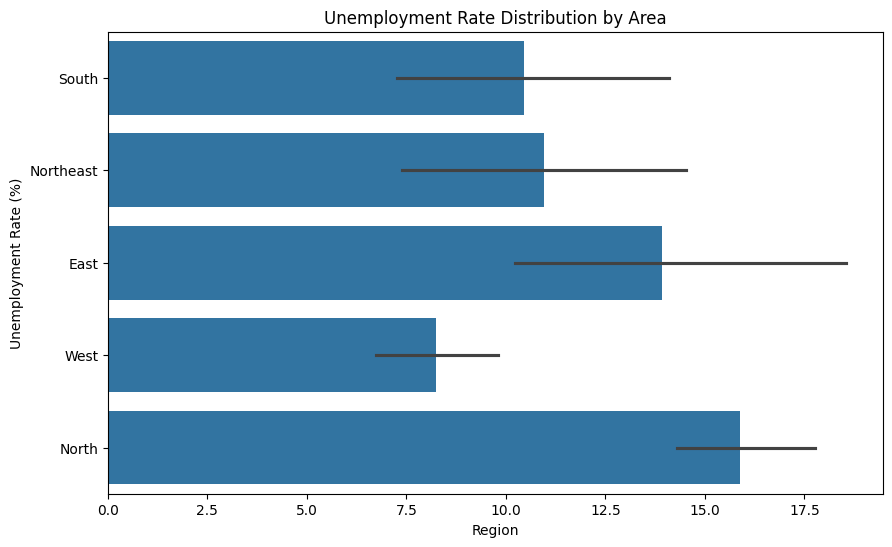

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(y='Region.1', x='Estimated Unemployment Rate (%)', data=df)
plt.title('Unemployment Rate Distribution by Area')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')

Text(0, 0.5, 'Unemployment Rate (%)')

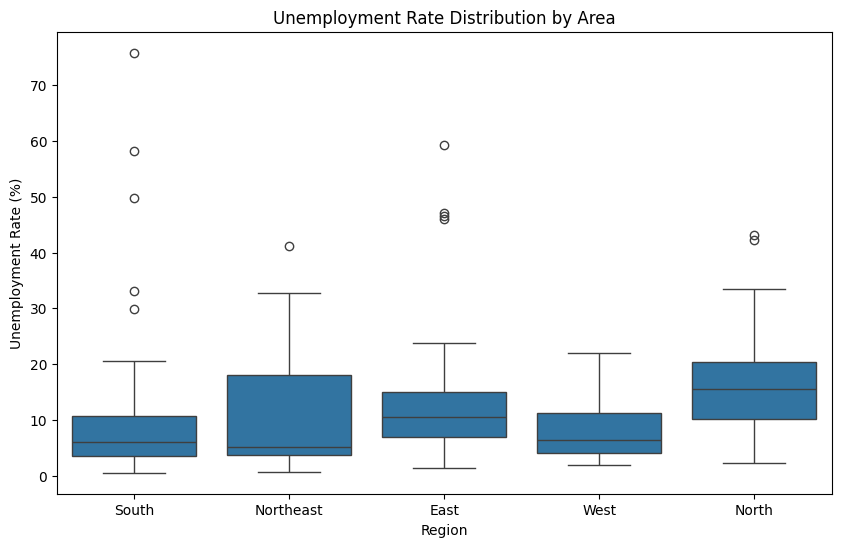

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region.1', y='Estimated Unemployment Rate (%)', data=df)
plt.title('Unemployment Rate Distribution by Area')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')

In [ ]:
import folium
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

In [ ]:
for idx, row in df.iterrows():
    folium.Circle(
        location=[row['longitude'], row['latitude']],
        radius=row['Estimated Unemployment Rate (%)'] * 1000,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=(
            f"Region: {row['Region']}<br>"
            f"Unemployment Rate: {row['Estimated Unemployment Rate (%)']}%"
        )
    ).add_to(india_map)

india_map.save("unemployment_map.html")
india_map

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

<ipython-input-8-a28349389ac4>:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
x = df[['Estimated Labour Participation Rate (%)','Estimated Employed']]
y = df['Estimated Unemployment Rate (%)']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 107089068032.0000 - val_loss: 19875051520.0000
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11513938944.0000 - val_loss: 861946560.0000
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 644140864.0000 - val_loss: 2193847296.0000
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2330388736.0000 - val_loss: 2569873408.0000
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1621276416.0000 - val_loss: 108438816.0000
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 68098152.0000 - val_loss: 376643360.0000
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 424099296.0000 - val_loss: 292593280.0000
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 181638432.0000 - val_loss: 40476.4844
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16831318.0000 - val_loss: 70614120.0000
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 56790816.0000 - val_loss: 14804847.0000
Epoch 11/50
7/7

In [ ]:
x_new = x_test.iloc[-1].values.reshape(1, -1, 1)
y_pred = model.predict(x_new)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[3.7813323]], dtype=float32)